![title](https://indianapublicmedia.org/images/news-images/coronavirus-header-1920-x350.jpg)
![title](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSHtOUoXGZ73Wj51aQ04ovhlz5_GcTKJeeV7RNWwKGv-EMW2DAs)

# <center> Coronavirus - La France se prépare à l'épidémie. Les principales inquiétudes des Français sur les COVID-19 avec aux données de Google Trends </center>

 <center> <a href="http://www.roqueleal.me">Roque Leal</a> </center>

L'émergence récente d'un nouveau coronavirus (2019-nCoV) a gagné une large couverture dans les médias publics
et des nouvelles mondiales. Ce cahier jupyter donne une brève introduction sur la façon dont la demande d'informations
sur cette nouvelle épidémie est signalée par Google Trends en France.


# Source de données

Les données sont collectées auprès de Google Trends. Google Trends présente des données normalisées. Le plus haut l'intérêt sur la requête de recherche est exprimé par 100, tandis que le manque d'intérêt ou le nombre insuffisant de données est exprimé par 0. Les requêtes sont collectées à partir de cinq moteurs de recherche spécialisés: Web, Image, News, Google Shopping et Recherche YouTube.

Dans ce cas, les données sont récupérées, avant puisque la première mention de cette maladie est notée par Google, en novembre 2019. Les données proviennent de Web Search for France. Le premier paramètre est de connaître l'impact de la tendance et de l'économie, les tendances seront comparées au marché boursier français (CAC 40). La seconde n'est que la tendance de la date de cette étude, afin de connaître les requêtes les plus fréquentes, la situation géographique et la tendance des requêtes les plus fréquentes

Une mise en garde importante concernant les données de Google Trends: elle ne révèle pas exactement combien de personnes recherchent un terme donné, elle donne simplement une idée de la hausse ou de la baisse de popularité de ce terme.

# Méthodes et résultats

## Configurer les modules et les packages en python

In [1]:
# !pip install pytrends
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from pytrends.request import TrendReq
import time
import pandas as pd
import matplotlib
import gtrend   
import seaborn as sns
from pandas.io.json import json_normalize
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-darkgrid')
matplotlib.rcParams['font.family'] = ['DejaVu Sans']
def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)

def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)

Configurer les termes et conditions de la requête

In [2]:
pytrend = TrendReq(hl='fr-FR', tz=60)
keyword = 'coronavirus'
start = '2019-10-01'
end = '2020-03-11'
geo='FR'
cat=0
gprop=''

## Google Trends recherche la France

Acquérir des données de tendance Google quotidiennes pendant plus de 5 mois en concaténant plusieurs requêtes et normaliser (scaling) en fonction de la période de chevauchement (overlapping method)

In [3]:
overlapping = gtrend.get_daily_trend(pytrend, keyword, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=60)

Fetching 'coronavirus' for period:2019-06-16 2020-03-11
Normalize by overlapping period:2020-03-05 2020-03-09


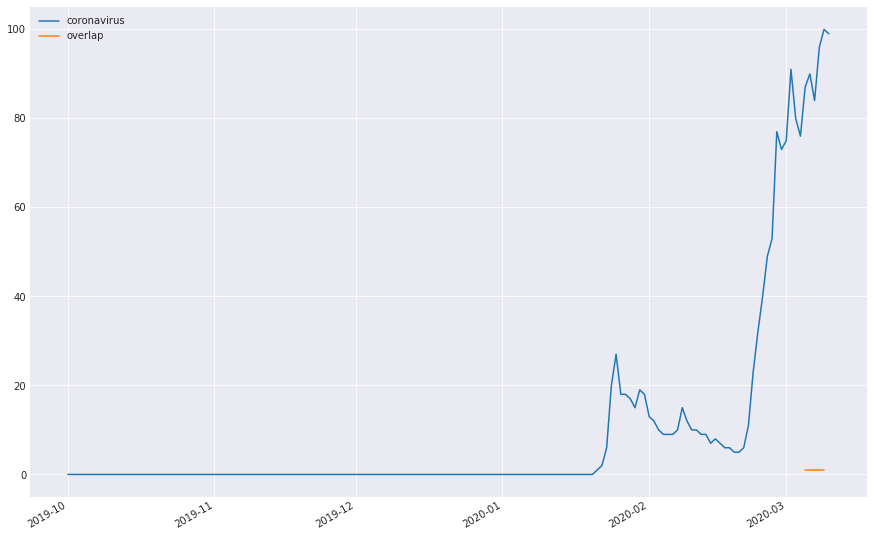

In [4]:
overlapping.plot(figsize=(15,10))

Acquérir des données de tendance Google quotidiennes pendant plus de 5 mois en concaténant plusieurs requêtes non chevauchantes de 1 mois et normaliser (scaling) par valeur de tendance hebdomadaire de la même période. (pytrends dailydata.py method)

In [5]:
from pytrends import dailydata

start_d = datetime.strptime(start, '%Y-%m-%d')
end_d = datetime.strptime(end, '%Y-%m-%d')
s_year = start_d.year
s_mon = start_d.month
e_year = end_d.year
e_mon = end_d.month

dailydata = dailydata.get_daily_data(word= keyword,
                 start_year= s_year,
                 start_mon= s_mon,
                 stop_year= e_year,
                 stop_mon= e_mon,
                 geo= geo,
                 verbose= False,
                 wait_time = 1.0)

Index(['coronavirus_unscaled', 'coronavirus_monthly', 'isPartial', 'scale',
       'coronavirus'],
      dtype='object')


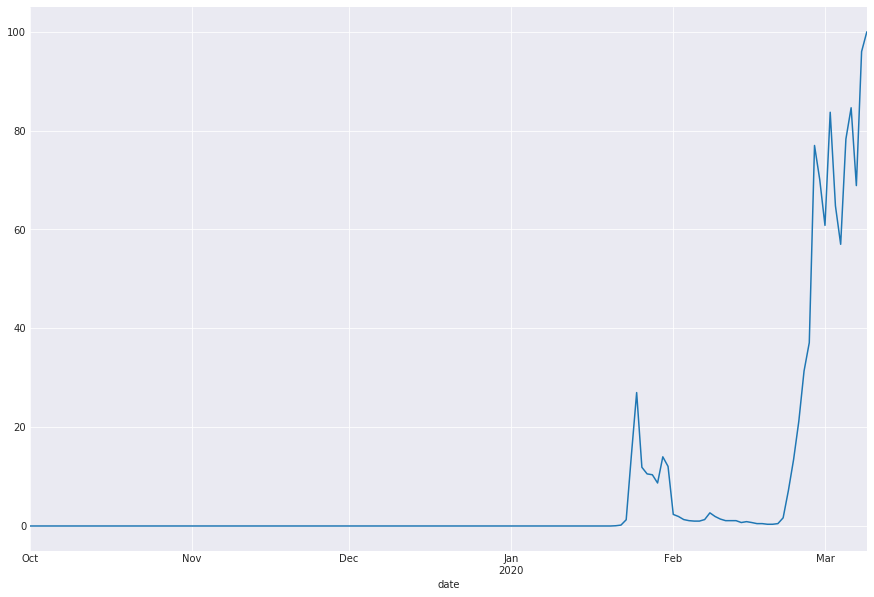

In [6]:
print(dailydata.columns)
dailydata[f'{keyword}'].plot(figsize=(15,10))

Les données de tendance hebdomadaire pourraient être une référence pour comparer les méthodes de normalisation ci-dessus. Pour une période de requête comprise 120 jours (~ 4 mois), la tendance google renverra des données weely.
Pour avoir une échelle d'axe comparable, les données hebdomadaires sont interpolées pour obtenir des données quotidiennes.

In [7]:
tf = start_d.strftime('%Y-%m-%d')+' '+end_d.strftime('%Y-%m-%d')
pytrend.build_payload(kw_list=[keyword], cat=cat, geo=geo, gprop=gprop, timeframe=tf)
week = pytrend.interest_over_time()
week_interp = week.resample('D').mean()
week_interp[f'{keyword}'] = week_interp[f'{keyword}'].interpolate()

In [8]:
week_interp.drop(columns='isPartial', inplace=True)

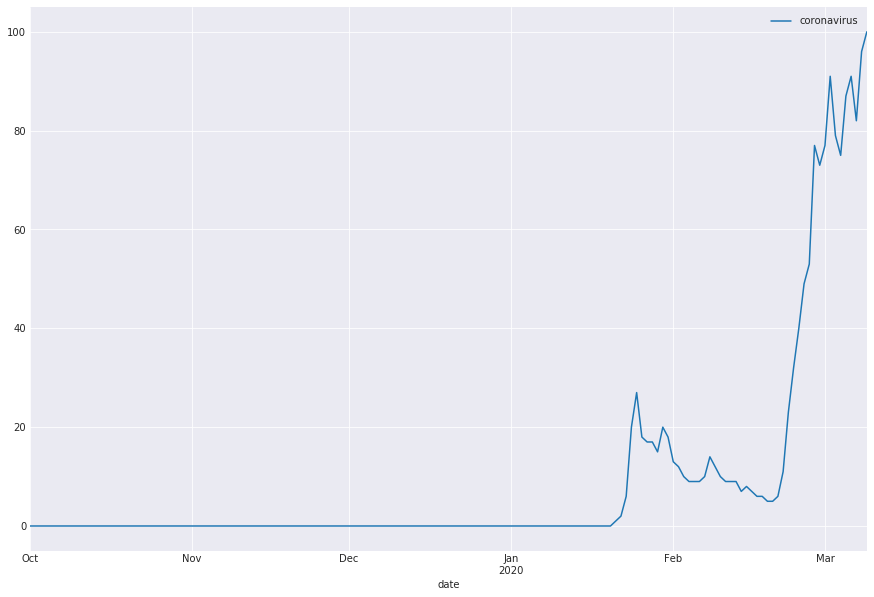

In [9]:
week_interp.plot(figsize=(15,10))

Pour une meilleure comparaison visuelle, rassemblons les 3 ensembles de données.

In [10]:
overlapping.loc[:,keyword]

2019-10-01 01:00:00      0.0
2019-10-02 01:00:00      0.0
2019-10-03 01:00:00      0.0
2019-10-04 01:00:00      0.0
2019-10-05 01:00:00      0.0
                       ...  
2020-03-06 01:00:00     90.0
2020-03-07 01:00:00     84.0
2020-03-08 01:00:00     96.0
2020-03-09 01:00:00    100.0
2020-03-10 01:00:00     99.0
Freq: D, Name: coronavirus, Length: 162, dtype: float64

In [11]:
overlapping.columns

Index(['coronavirus', 'overlap'], dtype='object')

In [12]:
combined = pd.concat([overlapping, dailydata.loc[:,keyword], week_interp], axis=1)

In [13]:
combined.tail(20)

,coronavirus,overlap,coronavirus,coronavirus
2020-02-29 01:00:00,73.0,NaN,NaN,NaN
2020-03-01 00:00:00,NaN,NaN,60.83,77.0
2020-03-01 01:00:00,75.0,NaN,NaN,NaN
2020-03-02 00:00:00,NaN,NaN,83.72,91.0
2020-03-02 01:00:00,91.0,NaN,NaN,NaN
2020-03-03 00:00:00,NaN,NaN,64.78,79.0
2020-03-03 01:00:00,80.0,NaN,NaN,NaN
2020-03-04 00:00:00,NaN,NaN,57.00,75.0
2020-03-04 01:00:00,76.0,NaN,NaN,NaN
2020-03-05 00:00:00,NaN,NaN,78.30,87.0


In [14]:
combined.columns = ['overlapping method','overlap period', 'dailydata method', 'weekly data']
combined = combined.resample('D').mean()

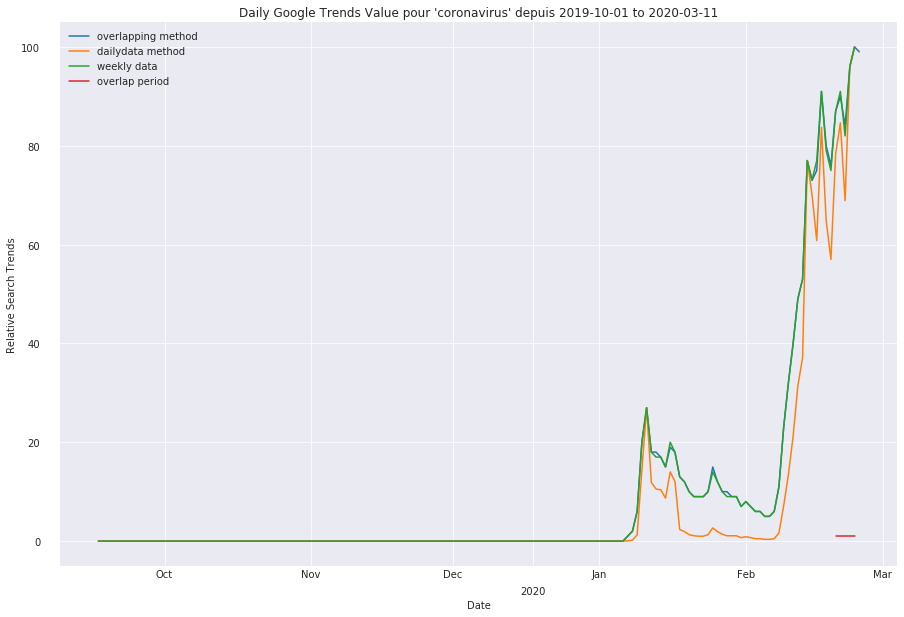

In [16]:
import matplotlib.dates as mdates
from cycler import cycler
from matplotlib.cm import get_cmap

combined2 = combined.iloc[:, [0,2,3,1]]
combined2.index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in combined2.index]
# c = ['royalblue', 'darkorange', 'limegreen', 'salmon']
# colors = plt.cm.Paired(np.linspace(0,1,4)) # This returns RGBA; convert:
c = []
for i in range(0,4):
    c.append(matplotlib.colors.rgb2hex(plt.cm.tab10(i)))
ax = combined2.plot(figsize=(15,10), color=c)
# set line colors
# c = plt.cm.hot(np.linspace(0,1,4))
# ax.set_prop_cycle(cycler('color', c))
# ax.set_prop_cycle(color=colors)
# ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,30)))
# set monthly locator
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.tick_params(direction='out', pad=20)
# set font and rotation for date tick labels
# plt.gcf().autofmt_xdate()
ax.xaxis.grid(True, which='minor')

plt.ylabel('Relative Search Trends')
plt.xlabel('Date')
plt.title('Daily Google Trends Value pour \'coronavirus\' depuis '+start+' to '+end)
# plt.set_cmap('Pastel2')

plt.show()


La figure montre que l'intérêt pour le coronavirus en France a commencé à partir de janvier 2020. Il est visible dans la ligne de tendance, que l'intérêt croissant s'accélère avec les premiers cas signalés en France et atteint des valeurs maximales en mars, peut-être en raison de la mesures gouvernementales extrêmes pour protéger l'épidémie par les pays de l'Union européenne.

In [17]:
 ax.get_lines()[0].get_color(), ax.get_lines()[1].get_color(), ax.get_lines()[2].get_color(), ax.get_lines()[3].get_color()

('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728')

In [18]:
combined['overlap period'].fillna(value='0', inplace=True)
combined.tail(20)

,overlapping method,overlap period,dailydata method,weekly data
2020-02-20,5.0,0,0.35,5.0
2020-02-21,6.0,0,0.48,6.0
2020-02-22,11.0,0,1.65,11.0
2020-02-23,23.0,0,7.13,23.0
2020-02-24,32.0,0,13.44,32.0
2020-02-25,40.0,0,21.20,40.0
2020-02-26,49.0,0,31.36,49.0
2020-02-27,53.0,0,37.10,53.0
2020-02-28,77.0,0,77.00,77.0
2020-02-29,73.0,0,70.08,73.0


Concentrons-nous sur une période plus courte, comme 2020 jan à 2020 mars où les données de tendance varient beaucoup et 3 méthodes ont donné des valeurs assez différentes. Dans ce cas, nous pouvons même récupérer les «vraies» données quotidiennes directement à partir de la tendance google (période inférieure à 5 mois) sans faire de mise à l'échelle / traitement pour comparaison.

In [19]:
p_start = '2020-01-20'
p_end = '2020-03-11'
# p_start_d = datetime.strptime(p_start, '%Y-%m-%d')
# p_end_d = datetime.strptime(p_end, '%Y-%m-%d')
tf = p_start+' '+p_end
geo='FR'
pytrend.build_payload(kw_list=[keyword], cat=cat, geo=geo, gprop=gprop, timeframe=tf)
daily_real = pytrend.interest_over_time()

In [20]:
combined_period = combined.loc[p_start:p_end]
combined_period  = pd.concat([combined_period,daily_real], axis=1)
combined_period.drop(columns=['isPartial','overlap period'], inplace=True)
combined_period.columns = ['overlapping method', 'dailydata method', 'weekly data', 'original data']

In [21]:
c = []
for i in range(0,7):
    c.append(matplotlib.colors.rgb2hex(plt.cm.tab10(i)))
c

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

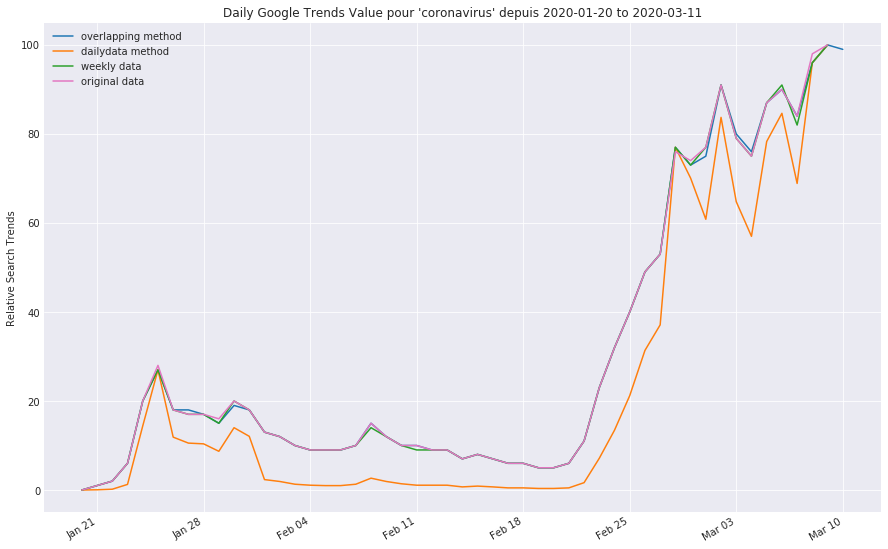

In [22]:
#combined_period.plot(figsize=(15,10))
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

combined2 = combined_period.copy()
combined2.index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in combined2.index]
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2']
ax = combined2.plot(figsize=(15,10), color=c)
# set weekday locator
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=TU))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.ylabel('Relative Search Trends')
plt.xlabel(None)
plt.title('Daily Google Trends Value pour \'coronavirus\' depuis '+p_start+' to '+p_end)




plt.show()

Les données quotidiennes ont évidemment une différence plus grande que les valeurs réelles et hebdomadaires, mais cette valeur ajustée suit la même tendance que les autres.

Les recherches de "coronavirus" ont été multipliées par sept environ depuis le 25 février, coïncidant avec le premier décès dû à cette maladie https://www.lefigaro.fr/sciences/coronavirus-avec-6-nouveaux-cas-et-1-mort-en-moins-de-48-heures-la-surveillance-se-complique-en-france-20200226

![title](https://www.roqueleal.me/images/lemonde.jpg)

## Le CAC 40 victime du coronavirus :  Google Trends recherche la France et Le CAC40

Examinons maintenant le comportement de la Bourse française avec l'indice des prix du CAC 40 et les tendances de recherche de Google dans le coronavirus identifiées ci-dessus.

In [23]:
import yfinance as yf

ticker = yf.Ticker("^FCHI")
print(ticker)
ticker.info
frstock = ticker.history(start=start, end=end)

yfinance.Ticker object <^FCHI>


In [24]:
combined_stock = pd.concat([combined, frstock.Close], axis=1)
combined_stock.drop(columns=['dailydata method', 'overlap period'], inplace=True)

In [25]:
combined_stock.columns = ['daily trends', 'weekly trends', 'CAC40 stock price']

In [26]:
combined_stock.head()

,daily trends,weekly trends,CAC40 stock price
2019-10-01,0.0,0.0,5597.63
2019-10-02,0.0,0.0,5422.77
2019-10-03,0.0,0.0,5438.77
2019-10-04,0.0,0.0,5488.32
2019-10-05,0.0,0.0,NaN


In [29]:
cor_fr = pd.merge(combined2, combined_stock,left_index=True, right_index=True)

<Figure size 432x288 with 0 Axes>

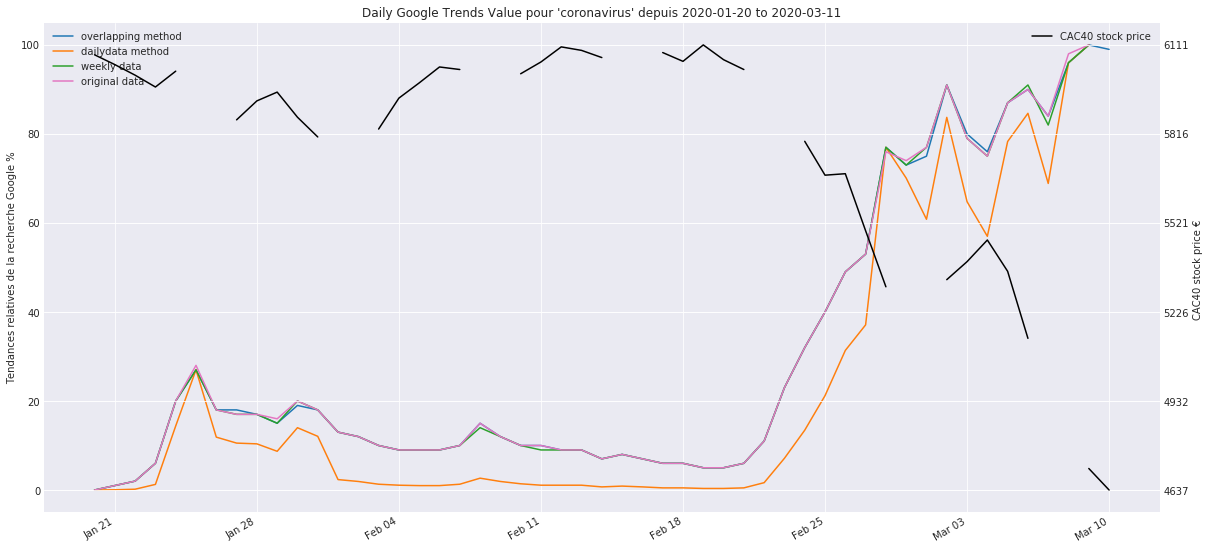

In [30]:
fig = plt.figure()
ax = combined2.plot(figsize=(20,10), color=c)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=TU))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

ax2 = ax.twinx()
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=TU))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
CAC40 = ax2.plot(cor_fr['CAC40 stock price'], color='black')
ax2.legend(['CAC40 stock price'])

l = ax.get_ylim()
l2 = ax2.get_ylim()
f = lambda x : l2[0]+(x-l[0])/(l[1]-l[0])*(l2[1]-l2[0])
ticks = f(ax.get_yticks())
ax2.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks))

plt.gcf().autofmt_xdate()

ax.set_ylabel('Tendances relatives de la recherche Google %')
ax2.set_ylabel('CAC40 stock price € ')
plt.title('Daily Google Trends Value pour \'coronavirus\' depuis '+p_start+' to '+p_end)

plt.show()

Ce graphique montre comment le scepticisme des investisseurs à l'égard des mesures de soutien économique, la guerre des prix sur le marché de l'or noir et le reclassement de l'épidémie de Covid-19 dans une "pandémie" n'ont pas permis au marché de Paris de refléter les bénéfices .

## Analyser les termes de recherche et les domaines les plus intéressants

In [31]:
pytrend.build_payload(kw_list=['coronavirus'], geo = 'FR', timeframe = 'now 1-d')
interest_over_time_df = pytrend.interest_over_time()

In [32]:
print(interest_over_time_df.tail())

                     coronavirus isPartial
date                                      
2020-03-11 19:36:00           80     False
2020-03-11 19:44:00           74     False
2020-03-11 19:52:00           74     False
2020-03-11 20:00:00           75     False
2020-03-11 20:08:00           74      True


In [33]:
interest_by_region_df = pytrend.interest_by_region()

Text(0.5, 1.0, 'Daily Google Trends Value par Coronavirus par Région Française')

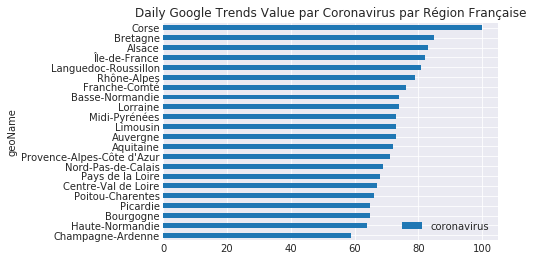

In [34]:
interest_by_region_df.sort_values(by = 'coronavirus', ascending = True).plot.barh()
plt.title('Daily Google Trends Value par Coronavirus par Région Française')

Il s'agit d'une répartition de la popularité par zone géographique des recherches google associées au coronavirus en la France

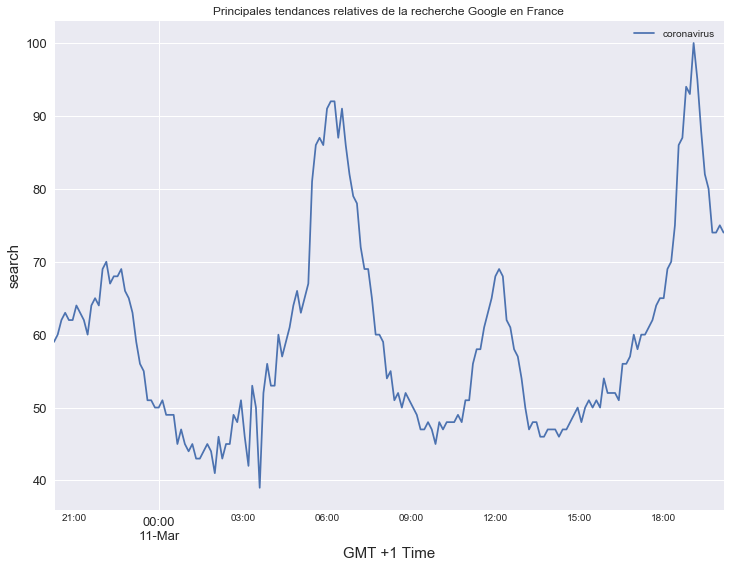

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes= False)
dx = interest_over_time_df.plot.line(figsize = (12,9),title = "Principales tendances relatives de la recherche Google en France")
dx.set_xlabel('GMT +1 Time', fontsize = 15)
dx.set_ylabel('search',fontsize = 15)
dx.tick_params(axis='both', which='major', labelsize=13)

Nous voyons en détail les consultations d'aujourd'hui 11 mars et comment la fréquence se concentre sur les heures du matin, du midi et de la nuit en dehors des heures de travail

In [36]:
kw_list= ['coronavirus']

pytrend.build_payload(kw_list=kw_list, geo = 'FR', timeframe = '2019-10-01 2020-11-03')
related_queries= pytrend.related_queries()
print(related_queries)

{'coronavirus': {'top':                         query  value
0          france coronavirus    100
1              le coronavirus     38
2             cas coronavirus     23
3        symptome coronavirus     20
4           carte coronavirus     19
5       coronavirus en france     17
6          italie coronavirus     16
7           chine coronavirus     16
8                      italie     16
9          cas de coronavirus     13
10                     corona     12
11           coronavirus mort     11
12          coronavirus paris     11
13        stade 3 coronavirus     11
14     cas coronavirus france     10
15         direct coronavirus      7
16          coronavirus monde      7
17      symptomes coronavirus      6
18       coronavirus symptôme      6
19  cas de coronavirus france      6
20               corona virus      6
21   carte france coronavirus      6
22  coronavirus cas en france      6
23           coronavirus lyon      6
24           info coronavirus      5, 'rising':    

In [37]:
type(related_queries)

dict

In [38]:
related = related_queries['coronavirus']['top']
related

,query,value
0,france coronavirus,100
1,le coronavirus,38
2,cas coronavirus,23
3,symptome coronavirus,20
4,carte coronavirus,19
5,coronavirus en france,17
6,italie coronavirus,16
7,chine coronavirus,16
8,italie,16
9,cas de coronavirus,13


In [39]:
grows = related_queries['coronavirus']['rising']
grows

,query,value
0,france coronavirus,1719650
1,le coronavirus,650400
2,cas coronavirus,396850
3,carte coronavirus,326300
4,coronavirus en france,300600
5,italie coronavirus,279250
6,chine coronavirus,277000
7,italie,272700
8,cas de coronavirus,229100
9,corona,206300


In [40]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['cas coronavirus', 'coronavirus en france', 'chine coronavirus', 'italie','coronavirus symptome'], geo = 'FR', timeframe = 'today 3-m')
interest_over_time_df = pytrend.interest_over_time()

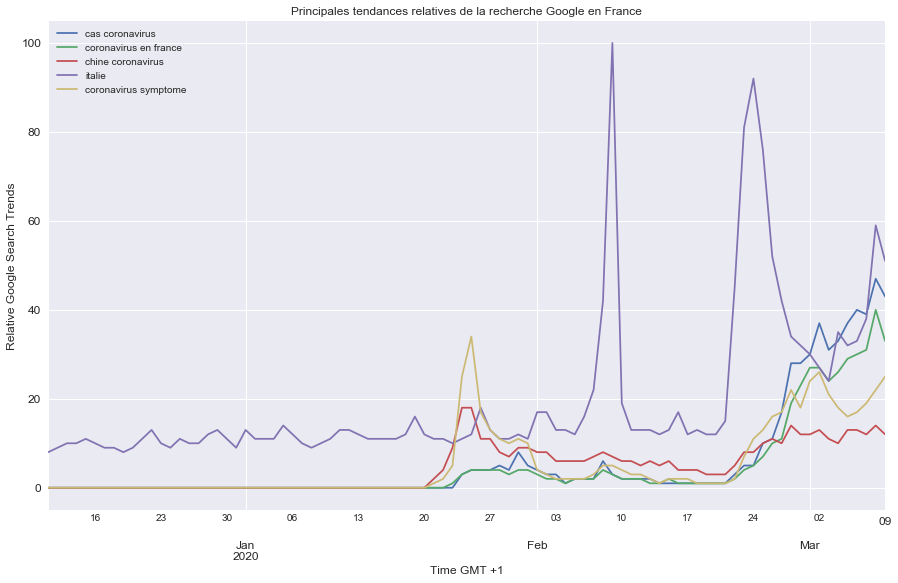

In [41]:
sns.set(color_codes= False)
dx2 = interest_over_time_df.plot.line(figsize = (15,9),title = "Principales tendances relatives de la recherche Google en France")
dx2.set_xlabel('Time GMT +1', fontsize = 12)
dx2.set_ylabel('Relative Google Search Trends',fontsize = 12)
dx2.tick_params(axis='both', which='major', labelsize=12)

# Conclusions

À l'ère des BigData, l'analyse des requêtes Google est devenue un outil précieux pour les chercheurs pour explorer et prédire le comportement humain, car il a été suggéré que les données en ligne sont corrélées avec les données réelles sur la santé.

Il est important d'utiliser les données de Google Trends dans l'évaluation des coronavirus pour aider les chercheurs, les responsables de la santé et les organisations. 

Mais l'analyse des données de Google Trends présente plusieurs limites, car l'examen des données Web peut porter des menaces à la validité. Une analyse minutieuse doit être effectuée pour s'assurer que les reportages et les événements soudains ne compromettent pas la validité des résultats. De plus, comme l'échantillon est inconnu, plusieurs autres facteurs démographiques tels que l'âge et le sexe ne peuvent pas être inclus dans l'analyse.

Les consultations faites pour la France nous permettent réponse à des questions telles que les jours avec la fréquence la plus élevée de consultations, le calendrier des interactions, les régions avec le plus de consultations et la tendance de la popularité des informations sur le coronavirus pour examiner les comportements de la communication collective sur Internet.

Nous comparons également la variable boursière et la façon dont la prise de décision financière est affectée par les préoccupations concernant le futur proche de la progression de la maladie, ainsi que les actions pour la prévenir.

La signification des résultats ci-dessus est que l'infodémiologie avec l'analyse des tendances de Google fournit une caractéristique référence à recadrer les discussions sur l’effet COVID-19, ainsi que des schémas substantiels de la prochaine infodémie.

# Références

<a href="https://trends.google.com/trends/?geo=FR">Google Trends</a>

<a href="https://pypi.org/project/pytrends/1.1.3/">pytrends 1.1.3</a>

<a href="https://www.researchgate.net/publication/333457255_Google_Trends_in_Infodemiology_and_Infoveillance_Methodology_Framework">Google Trends in Infodemiology and Infoveillance:MethodologyFramework</a>

<a href="https://towardsdatascience.com/tracking-coronavirus-engagement-with-google-trends-in-python-5a4b08bc6977">Analyzing Coronavirus Engagement with Google Trends in Python</a>

## 👍👍 <center> <a href="https://www.linkedin.com/in/lealrlx/">Partagez vos idées et vos commentaires, écrivez-moi 🌍 </a> </center>##